In [19]:
import requests
import pandas as pd

# PL
api_token = 'fe99bf7a91b04b59948cda6eeef8e12c'
url = 'https://api.football-data.org/v4/competitions/BL1/standings'
headers = {'X-Auth-Token': api_token}

# Parameters to select matchday and seasone
params = {
    'season': '2021',
    'matchday': '1'  
}


response = requests.get(url, headers=headers, params=params)


if response.status_code == 200:
    data = response.json()

    
    if 'standings' in data:
       
        all_standings = []
        for standing_type in data['standings']:  
            for entry in standing_type['table']:
                team_info = entry['team']
                all_standings.append({
                    'position': entry['position'],
                    'team_id': team_info['id'],
                    'team_name': team_info['name'],
                    'playedGames': entry['playedGames'],
                    'form': entry['form'],
                    'won': entry['won'],
                    'draw': entry['draw'],
                    'lost': entry['lost'],
                    'points': entry['points'],
                    'goalsFor': entry['goalsFor'],
                    'goalsAgainst': entry['goalsAgainst'],
                    'goalDifference': entry['goalDifference']
                })

        
        standings_df = pd.DataFrame(all_standings)

        
        standings_df.to_csv('BL1', index=False)
        print("Data saved to 'PL_2021_standings.csv'.")
    else:
        print("No 'standings' key found in the JSON response.")
else:
    print("Failed to retrieve data: ", response.status_code)


Data saved to 'PL_2021_standings.csv'.


In [36]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time


api_token = '0265d87fc4584efb9551abb422e1bc6b'
url = 'https://api.football-data.org/v4/competitions/SA/standings'
headers = {'X-Auth-Token': api_token}


season = '2020'
total_matchdays = 38


all_standings = []


for matchday in range(1, total_matchdays + 1):
    params = {
        'season': season,
        'matchday': str(matchday)  
    }
    
    
    response = requests.get(url, headers=headers, params=params)
    
    
    if response.status_code == 200:
        data = response.json()
        
        
        if 'standings' in data:
            for standing_type in data['standings']:  
                if standing_type['stage'] == 'REGULAR_SEASON':  
                    for entry in standing_type['table']:
                        
                        if entry['playedGames'] == matchday:
                            team_info = entry['team']
                            all_standings.append({
                                'matchday': matchday,
                                'position': entry['position'],
                                'team_name': team_info['name'],
                                'playedGames': entry['playedGames'],
                                'points': entry['points'],
                                'goalsFor': entry['goalsFor'],
                                'goalsAgainst': entry['goalsAgainst'],
                                'goalDifference': entry['goalDifference']
                            })
        
        time.sleep(10)  
    else:
        print(f"Failed to retrieve data for matchday {matchday}: ", response.status_code)
        
        if response.status_code == 429:
            time.sleep(10)  


standings_df = pd.DataFrame(all_standings)


standings_df.to_csv('SA_2020.csv', index=False)
print("Data saved")


Data saved


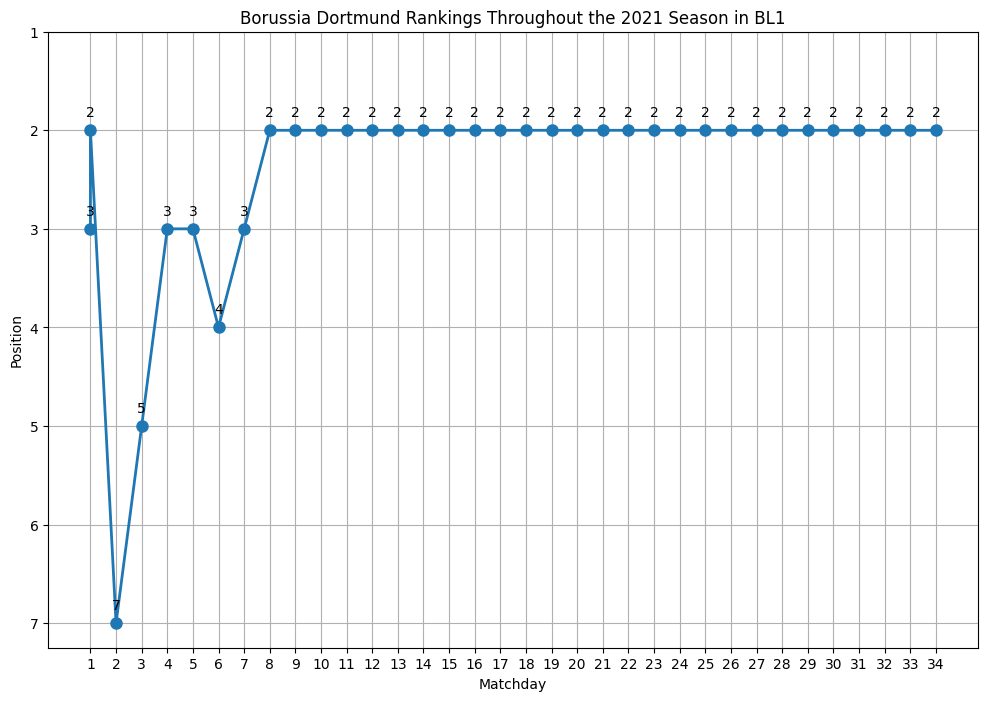

In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time


api_token = 'fe99bf7a91b04b59948cda6eeef8e12c'
headers = {'X-Auth-Token': api_token}


season = '2021'
league_code = 'BL1'  


if league_code in ['PD', 'PL', 'SA']:
    total_matchdays = 38
elif league_code in ['BL1', 'FL1']:
    total_matchdays = 34
else:
    raise ValueError("Unsupported league code")


base_url = 'https://api.football-data.org/v4/competitions'


all_standings = []


for matchday in range(1, total_matchdays + 1):
    url = f'{base_url}/{league_code}/standings'
    params = {
        'season': season,
        'matchday': str(matchday) 
    }
    
   
    response = requests.get(url, headers=headers, params=params)
    
    
    if response.status_code == 200:
        data = response.json()
        
        
        if 'standings' in data:
            for standing_type in data['standings']:  
                if standing_type['stage'] == 'REGULAR_SEASON':  
                    for entry in standing_type['table']:
                        
                        if entry['playedGames'] == matchday:
                            team_info = entry['team']
                            all_standings.append({
                                'matchday': matchday,
                                'position': entry['position'],
                                'team_name': team_info['name'],
                                'playedGames': entry['playedGames'],
                            })
        else:
            print(f"No standings data found for matchday {matchday}")
        
        time.sleep(10)  
    else:
        print(f"Failed to retrieve data for matchday {matchday}: ", response.status_code)
        print(response.text)  
        
        if response.status_code == 429:
            time.sleep(10)  


standings_df = pd.DataFrame(all_standings)

 
team_name = 'Borussia Dortmund' 
team_data = standings_df[standings_df['team_name'] == team_name]

if not team_data.empty:
    plt.figure(figsize=(12, 8))
    plt.plot(team_data['matchday'], team_data['position'], marker='o', linestyle='-', linewidth=2, markersize=8)
    
    
    for idx, row in team_data.iterrows():
        plt.annotate(row['position'], (row['matchday'], row['position']), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.gca().invert_yaxis() 
    plt.title(f"{team_name} Rankings Throughout the 2021 Season in {league_code}")
    plt.xlabel("Matchday")
    plt.ylabel("Position")
    plt.grid(True)
    plt.xticks(range(1, total_matchdays + 1))  
    plt.yticks(range(1, max(team_data['position']) + 1)) 
    plt.show()
else:
    print(f"No data found for team {team_name}")

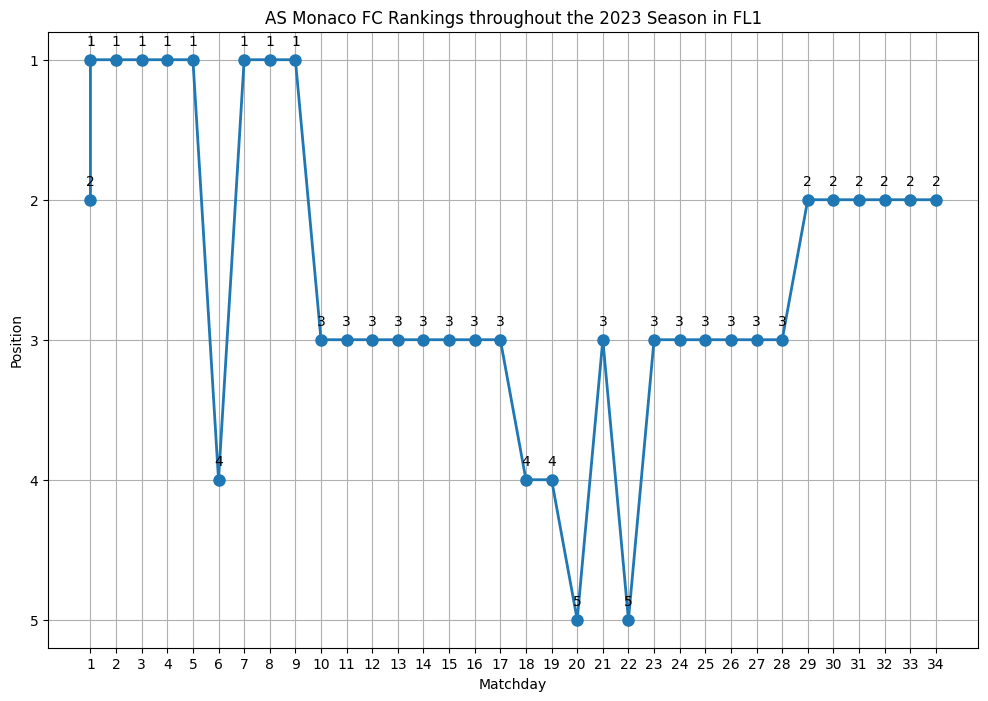

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters to select the season and league
season = '2023'
league_code = 'FL1'  
team_name = 'AS Monaco FC'

if league_code in ['PD', 'PL', 'SA']:
    total_matchdays = 38
elif league_code in ['BL1', 'FL1']:
    total_matchdays = 34
else:
    raise ValueError("Unsupported league code")


file_path = f'{league_code}_{season}.csv'


standings_df = pd.read_csv(file_path)

team_data = standings_df[standings_df['team_name'] == team_name]

if not team_data.empty:
    plt.figure(figsize=(12, 8))
    plt.plot(team_data['matchday'], team_data['position'], marker='o', linestyle='-', linewidth=2, markersize=8)
    
   
    for idx, row in team_data.iterrows():
        plt.annotate(row['position'], (row['matchday'], row['position']), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.gca().invert_yaxis() 
    plt.title(f"{team_name} Rankings throughout the {season} Season in {league_code}")
    plt.xlabel("Matchday")
    plt.ylabel("Position")
    plt.grid(True)
    plt.xticks(range(1, total_matchdays + 1)) 
    plt.yticks(range(1, max(team_data['position']) + 1))  
    plt.show()
else:
    print(f"No data found for team {team_name}")


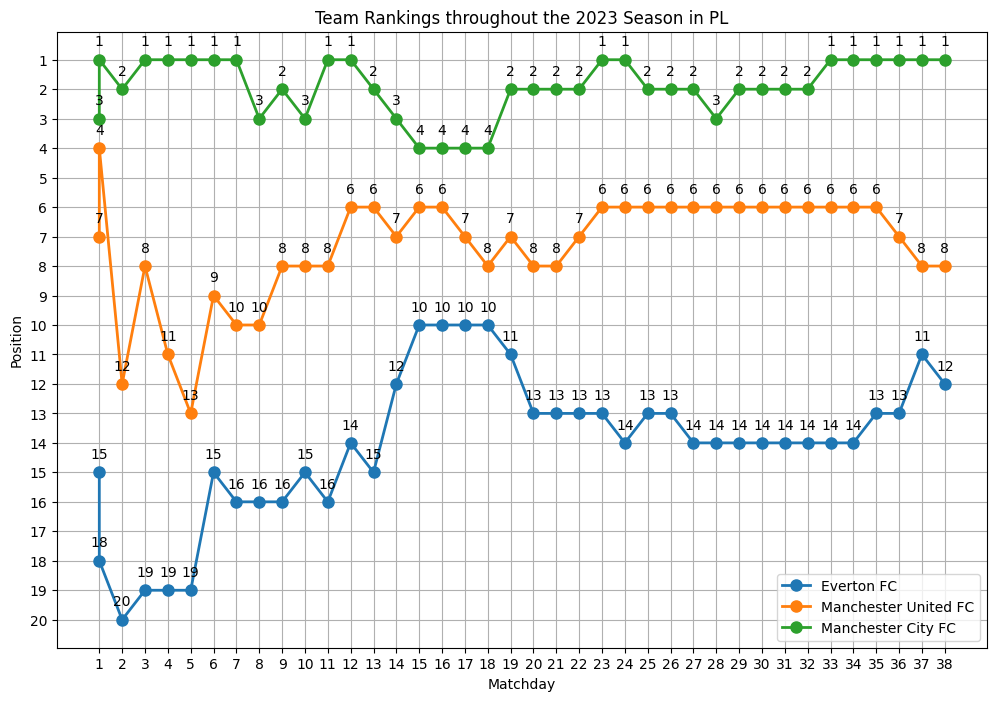

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


season = '2023'
league_code = 'PL'  
team_names = ['Everton FC', 'Manchester United FC', 'Manchester City FC']  


if league_code in ['PD', 'PL', 'SA']:
    total_matchdays = 38
    max_position = 20
elif league_code in ['BL1', 'FL1']:
    total_matchdays = 34
    max_position = 18
else:
    raise ValueError("Unsupported league code")


file_path = f'data/{league_code}_{season}.csv'


standings_df = pd.read_csv(file_path)

plt.figure(figsize=(12, 8))


for team_name in team_names:
    team_data = standings_df[standings_df['team_name'] == team_name]

    if not team_data.empty:
        plt.plot(team_data['matchday'], team_data['position'], marker='o', linestyle='-', linewidth=2, markersize=8, label=team_name)
        
        
        for idx, row in team_data.iterrows():
            plt.annotate(row['position'], (row['matchday'], row['position']), textcoords="offset points", xytext=(0,10), ha='center')
    else:
        print(f"No data found for team {team_name}")

plt.gca().invert_yaxis()  
plt.title(f"Team Rankings throughout the {season} Season in {league_code}")
plt.xlabel("Matchday")
plt.ylabel("Position")
plt.grid(True)
plt.xticks(range(1, total_matchdays + 1))  
plt.yticks(range(1, max_position + 1))  
plt.legend(loc='lower right') 
plt.show()


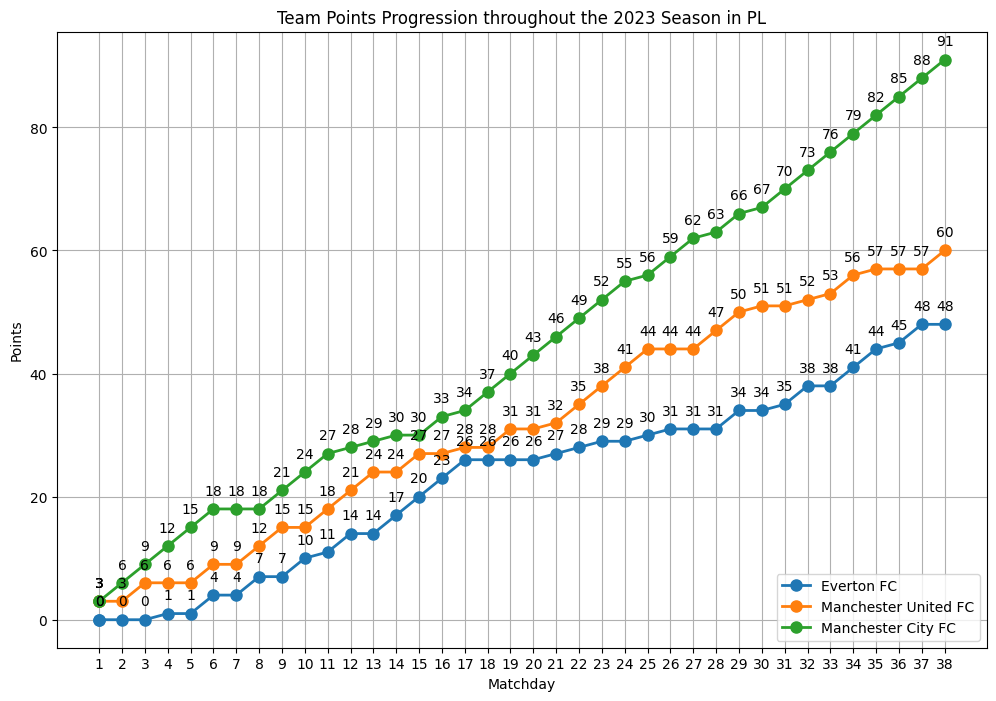

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


season = '2023'
league_code = 'PL'  
team_names = ['Everton FC', 'Manchester United FC', 'Manchester City FC']


if league_code in ['PD', 'PL', 'SA']:
    total_matchdays = 38
    max_position = 20
elif league_code in ['BL1', 'FL1']:
    total_matchdays = 34
    max_position = 18
else:
    raise ValueError("Unsupported league code")


file_path = f'data/{league_code}_{season}.csv'


standings_df = pd.read_csv(file_path)


plt.figure(figsize=(12, 8))


for team_name in team_names:
    team_data = standings_df[standings_df['team_name'] == team_name]

    if not team_data.empty:
        plt.plot(team_data['matchday'], team_data['points'], marker='o', linestyle='-', linewidth=2, markersize=8, label=team_name)
        
       
        for idx, row in team_data.iterrows():
            plt.annotate(row['points'], (row['matchday'], row['points']), textcoords="offset points", xytext=(0,10), ha='center')
    else:
        print(f"No data found for team {team_name}")


plt.title(f"Team points progression throughout the {season} Season in {league_code}")
plt.xlabel("Matchday")
plt.ylabel("Points")
plt.grid(True)
plt.xticks(range(1, total_matchdays + 1))  
plt.legend(loc='lower right')  
plt.show()


In [63]:
# Top scorers table

import pandas as pd
from tabulate import tabulate


season = '2023'
league_code = 'BL1'

file_path = f'data/{league_code}_{season}_Topscorers.csv'

top_scorers_df = pd.read_csv(file_path)

top_scorers_df.index += 1


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


table = tabulate(top_scorers_df, headers='keys', tablefmt='fancy_grid')
print(table)


╒════╤═══════════════════╤═════════════════════╤═════════╕
│    │ player            │ team                │   goals │
╞════╪═══════════════════╪═════════════════════╪═════════╡
│  1 │ Harry Kane        │ FC Bayern München   │      36 │
├────┼───────────────────┼─────────────────────┼─────────┤
│  2 │ Sehrou Guirassy   │ VfB Stuttgart       │      28 │
├────┼───────────────────┼─────────────────────┼─────────┤
│  3 │ Loïs Openda       │ RB Leipzig          │      24 │
├────┼───────────────────┼─────────────────────┼─────────┤
│  4 │ Deniz Undav       │ VfB Stuttgart       │      18 │
├────┼───────────────────┼─────────────────────┼─────────┤
│  5 │ Maximilian Beier  │ TSG 1899 Hoffenheim │      16 │
├────┼───────────────────┼─────────────────────┼─────────┤
│  6 │ Andrej Kramarić   │ TSG 1899 Hoffenheim │      15 │
├────┼───────────────────┼─────────────────────┼─────────┤
│  7 │ Ermedin Demirovic │ FC Augsburg         │      15 │
├────┼───────────────────┼─────────────────────┼────────

In [56]:
# Saving top scorers datasets
import requests
import pandas as pd
import time

api_token = '0265d87fc4584efb9551abb422e1bc6b'
headers = {'X-Auth-Token': api_token}

season = '2020'
league_code = 'SA'


url = f'https://api.football-data.org/v4/competitions/{league_code}/scorers'


def get_top_scorers(season, league_code):
    params = {'season': season}
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        print(data)  
        top_scorers = []
        for scorer in data['scorers']:
            player = scorer['player']['name']
            team = scorer['team']['name']
            goals = scorer['goals']
            top_scorers.append({
                'player': player,
                'team': team,
                'goals': goals
            })
        return top_scorers
    else:
        print(f"Failed to retrieve top scorers: {response.status_code}")
        if response.status_code == 429:
            time.sleep(10)
        return []


top_scorers = get_top_scorers(season, league_code)


top_scorers_df = pd.DataFrame(top_scorers)


csv_filename = f'{league_code}_{season}_Topscorers.csv'
top_scorers_df.to_csv(csv_filename, index=False)
print(f"Data saved to '{csv_filename}'")

{'count': 10, 'filters': {'season': 2020, 'limit': 10}, 'competition': {'id': 2019, 'name': 'Serie A', 'code': 'SA', 'type': 'LEAGUE', 'emblem': 'https://crests.football-data.org/SA.png'}, 'season': {'id': 638, 'startDate': '2020-09-19', 'endDate': '2021-05-23', 'currentMatchday': 38, 'winner': {'id': 108, 'name': 'FC Internazionale Milano', 'shortName': 'Inter', 'tla': 'INT', 'crest': 'https://crests.football-data.org/108.png', 'address': 'Corso Vittorio Emanuele II 9 Milano 20122', 'website': 'http://www.inter.it', 'founded': 1908, 'clubColors': 'Blue / Black', 'venue': 'Stadio Giuseppe Meazza', 'lastUpdated': '2021-11-24T14:55:58Z'}}, 'scorers': [{'player': {'id': 44, 'name': 'Cristiano Ronaldo', 'firstName': '', 'lastName': 'Cristiano Ronaldo', 'dateOfBirth': '1985-02-05', 'nationality': 'Portugal', 'section': 'Offence', 'position': None, 'shirtNumber': None, 'lastUpdated': '2023-09-19T09:52:08Z'}, 'team': {'id': 109, 'name': 'Juventus FC', 'shortName': 'Juventus', 'tla': 'JUV', 'c

In [68]:
import requests
import pandas as pd
import time


api_token = '93bdb2d473a847969e73438dd4064fea'
headers = {'X-Auth-Token': api_token}
base_url = 'http://api.football-data.org/v4/competitions'


def fetch_match_data(league_code, season, matchday):
    url = f'{base_url}/{league_code}/matches'
    params = {'season': season, 'matchday': matchday}
    retries = 5
    backoff_factor = 1
    
    for i in range(retries):
        response = requests.get(url, headers=headers, params=params, timeout=10)
        if response.status_code == 200:
            return response.json()
        elif response.status_code == 429:
            print(f"Rate limit exceeded for matchday {matchday}. Retrying in {backoff_factor * (2 ** i)} seconds...")
            time.sleep(backoff_factor * (2 ** i))
            continue
        else:
            print(f"Failed to retrieve data for matchday {matchday}: {response.status_code}")
            return None
    print(f"Failed to retrieve data for matchday {matchday} after {retries} retries.")
    return None


def save_match_data_to_csv(league_code, season, start_matchday, end_matchday):
    all_matches = []
    for matchday in range(start_matchday, end_matchday + 1):
        match_data = fetch_match_data(league_code, season, matchday)
        if match_data and 'matches' in match_data:
            all_matches.extend(match_data['matches'])
        else:
            print(f"No data found for matchday {matchday}")
        time.sleep(2)  
    
    if all_matches:
        matches_df = pd.json_normalize(all_matches)
        csv_filename = f'{league_code}_{season}_matchdays_{start_matchday}_to_{end_matchday}.csv'
        matches_df.to_csv(csv_filename, index=False)
        print(f"Data for matchdays {start_matchday} to {end_matchday} saved to '{csv_filename}'")

season = '2023'
league_code = 'PL'
total_matchdays = 38 if league_code in ['PL', 'PD', 'SA', 'FL1'] else 34

portion_size = 5
for start_matchday in range(1, total_matchdays + 1, portion_size):
    end_matchday = min(start_matchday + portion_size - 1, total_matchdays)
    save_match_data_to_csv(league_code, season, start_matchday, end_matchday)

Data for matchdays 1 to 5 saved to 'PL_2023_matchdays_1_to_5.csv'
Data for matchdays 6 to 10 saved to 'PL_2023_matchdays_6_to_10.csv'
Rate limit exceeded for matchday 12. Retrying in 1 seconds...
Rate limit exceeded for matchday 12. Retrying in 2 seconds...
Rate limit exceeded for matchday 12. Retrying in 4 seconds...
Rate limit exceeded for matchday 12. Retrying in 8 seconds...
Rate limit exceeded for matchday 12. Retrying in 16 seconds...
Failed to retrieve data for matchday 12 after 5 retries.
No data found for matchday 12
Rate limit exceeded for matchday 13. Retrying in 1 seconds...
Rate limit exceeded for matchday 13. Retrying in 2 seconds...
Data for matchdays 11 to 15 saved to 'PL_2023_matchdays_11_to_15.csv'
Data for matchdays 16 to 20 saved to 'PL_2023_matchdays_16_to_20.csv'
Rate limit exceeded for matchday 24. Retrying in 1 seconds...
Rate limit exceeded for matchday 24. Retrying in 2 seconds...
Rate limit exceeded for matchday 24. Retrying in 4 seconds...
Rate limit exceede

In [71]:
import requests
import pandas as pd
import os
import time


api_token = '93bdb2d473a847969e73438dd4064fea'
headers = {'X-Auth-Token': api_token}
base_url = 'http://api.football-data.org/v4/competitions'

def fetch_match_data(league_code, season, matchday):
    url = f'{base_url}/{league_code}/matches'
    params = {'season': season, 'matchday': matchday}
    retries = 5
    backoff_factor = 1
    
    for i in range(retries):
        response = requests.get(url, headers=headers, params=params, timeout=10)
        if response.status_code == 200:
            return response.json()
        elif response.status_code == 429:
            print(f"Rate limit exceeded for matchday {matchday}. Retrying in {backoff_factor * (2 ** i)} seconds...")
            time.sleep(backoff_factor * (2 ** i))
            continue
        else:
            print(f"Failed to retrieve data for matchday {matchday}: {response.status_code}")
            return None
    print(f"Failed to retrieve data for matchday {matchday} after {retries} retries.")
    return None


def save_matchday_data_to_csv(league_code, season, matchday):
    match_data = fetch_match_data(league_code, season, matchday)
    if match_data and 'matches' in match_data:
        matches_df = pd.json_normalize(match_data['matches'])
        csv_filename = f'{league_code}_{season}_matchday_{matchday}.csv'
        matches_df.to_csv(csv_filename, index=False)
        print(f"Data for matchday {matchday} saved to '{csv_filename}'")
    else:
        print(f"No data found for matchday {matchday}")


season = '2023'
league_code = 'PL'
matchday = 36
save_matchday_data_to_csv(league_code, season, matchday)


Data for matchday 36 saved to 'PL_2023_matchday_36.csv'


In [74]:
import os
import pandas as pd


data_frames = []


for file in os.listdir():
    if file.endswith('.csv') and file.startswith('PL_2023'):
        file_path = file
        df = pd.read_csv(file_path)
        data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)


sorted_df = merged_df.sort_values(by='matchday')


sorted_csv_filename = 'PL_2023_sorted.csv'
sorted_df.to_csv(sorted_csv_filename, index=False)

print(f"Sorted data saved to '{sorted_csv_filename}'")


Sorted data saved to 'PL_2023_sorted.csv'


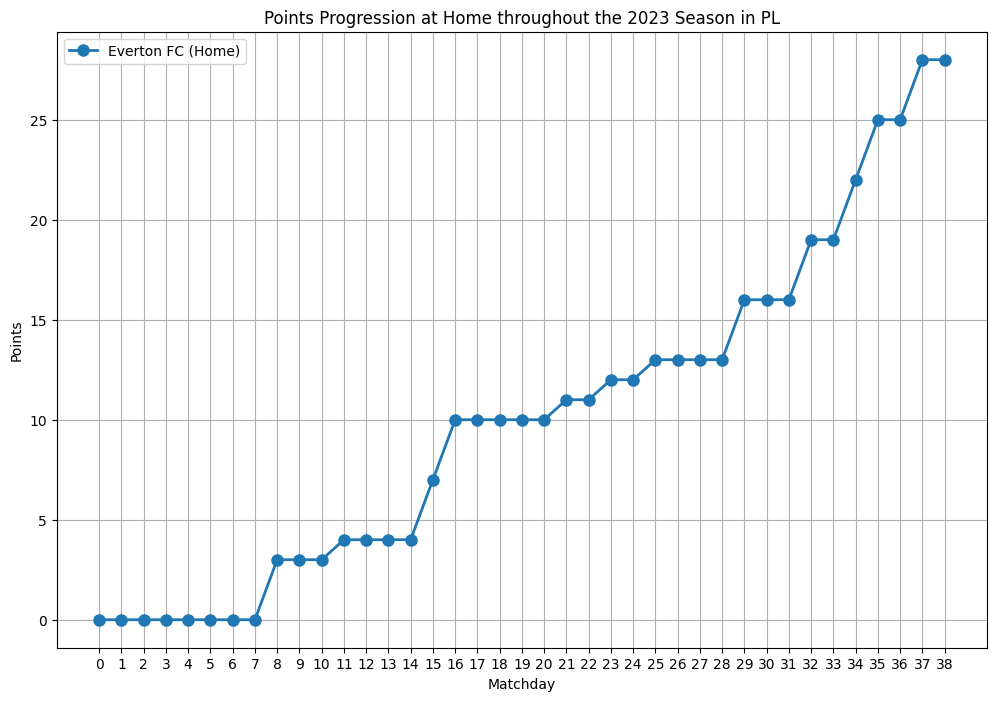

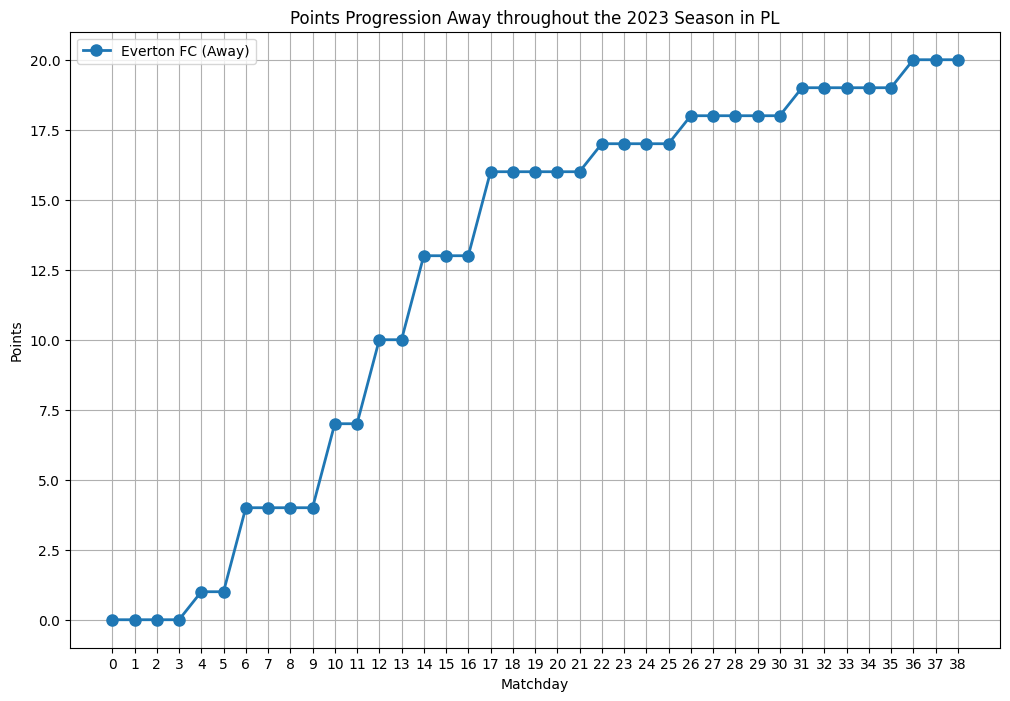

In [76]:
import pandas as pd
import matplotlib.pyplot as plt


def process_match_data(matches_df):
    home_points = {}
    away_points = {}
    
    for _, match in matches_df.iterrows():
        home_team = match['homeTeam.name']
        away_team = match['awayTeam.name']
        home_score = match['score.fullTime.home']
        away_score = match['score.fullTime.away']
        
        if home_score > away_score:
            home_points[home_team] = home_points.get(home_team, 0) + 3
            away_points[away_team] = away_points.get(away_team, 0)
        elif home_score < away_score:
            away_points[away_team] = away_points.get(away_team, 0) + 3
            home_points[home_team] = home_points.get(home_team, 0)
        else:
            home_points[home_team] = home_points.get(home_team, 0) + 1
            away_points[away_team] = away_points.get(away_team, 0) + 1
    
    return home_points, away_points


def plot_points_progression(league_code, season, team_names):
    
    file_path = f'data/{league_code}_{season}_sorted.csv'
    matches_df = pd.read_csv(file_path)
    
    total_matchdays = 38 if league_code in ['PL', 'PD', 'SA'] else 34
    
    
    home_points_progression = {team: [0] for team in team_names}
    away_points_progression = {team: [0] for team in team_names}
    
    
    for matchday in range(1, total_matchdays + 1):
        matchday_matches = matches_df[matches_df['matchday'] == matchday]
        home_points, away_points = process_match_data(matchday_matches)
        
       
        for team in team_names:
            home_points_progression[team].append(home_points_progression[team][-1] + home_points.get(team, 0))
            away_points_progression[team].append(away_points_progression[team][-1] + away_points.get(team, 0))
    
    
    plt.figure(figsize=(12, 8))
    for team in team_names:
        plt.plot(range(0, total_matchdays + 1), home_points_progression[team], marker='o', linestyle='-', linewidth=2, markersize=8, label=f'{team} (Home)')
    plt.title(f"Points Progression at Home throughout the {season} Season in {league_code}")
    plt.xlabel("Matchday")
    plt.ylabel("Points")
    plt.grid(True)
    plt.xticks(range(0, total_matchdays + 1))
    plt.legend(loc='best')
    plt.show()
    
    
    plt.figure(figsize=(12, 8))
    for team in team_names:
        plt.plot(range(0, total_matchdays + 1), away_points_progression[team], marker='o', linestyle='-', linewidth=2, markersize=8, label=f'{team} (Away)')
    plt.title(f"Points Progression Away throughout the {season} Season in {league_code}")
    plt.xlabel("Matchday")
    plt.ylabel("Points")
    plt.grid(True)
    plt.xticks(range(0, total_matchdays + 1))
    plt.legend(loc='best')
    plt.show()


season = '2023'
league_code = 'PL'
team_names = ['Everton FC']
plot_points_progression(league_code, season, team_names)
